In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_hindex.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [5]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predictions))


Coefficients: 
 [ 0.20658396  0.17184337  0.22387462 -0.0319472   0.1179496  -0.02131792
 -0.07188803 -0.00545114 -0.01461621 -0.05790211 -0.01229952 -0.00681611
 -0.03505903  0.03070035 -0.04834764  0.17841869 -0.03848955  0.05397672
 -0.74757459 -0.10202195  0.31333409 -0.35572866  0.08302483  0.02541309
 -0.29553803  0.58104991 -0.02542214 -0.00824571  0.85904157 -0.05062307
  0.0869145   0.05129446  0.02977637 -0.03882619 -0.05716607]
Mean squared error: 0.01
Variance score: 0.77


In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.77640798  0.77240131  0.76293654  0.78024672]


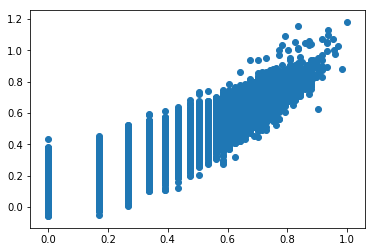

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(99178,)
(99178,)
R2Score: 0.773335793392
RMSE: 0.08503123842014623
